In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data/train.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [3]:
df.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

### Data Preprocessing

In [5]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points 
    on the Earth's surface given their latitude and longitude 
    coordinates in degrees.
    """
    R = 6371  
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)
    
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    
    a = np.sin(dlat/2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    distance = R * c  
    return distance

In [6]:
def delivery_dist(df):

    lat_res = df['Restaurant_latitude'].values
    long_res = df['Restaurant_longitude'].values

    lat_deliver_loc = df['Delivery_location_latitude'].values
    long_deliver_loc = df['Delivery_location_longitude'].values
    
    dist = haversine(lat_deliver_loc, long_deliver_loc, lat_res, long_res)

    df['Delivery_distance_km'] = dist
    df.drop(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'], axis=1, inplace=True)


    return df

In [7]:
df = delivery_dist(df)
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Delivery_distance_km
0,0x4607,INDORES13DEL02,37,4.9,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,3.025149
1,0xb379,BANGRES18DEL02,34,4.5,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,20.183530
2,0x5d6d,BANGRES19DEL01,23,4.4,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,1.552758
3,0x7a6a,COIMBRES13DEL02,38,4.7,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,7.790401
4,0x70a2,CHENRES12DEL01,32,4.6,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,6.210138


In [8]:
def check_nan_object(df):
    columns = [col for col in df.columns if df[col].dtype == 'object']

    for col in columns:
        print(f"unique entries in {col}:", df[col].unique())
        print("number of missing values: ",df[col].str.contains("NaN").sum())
        
    return 

In [9]:
# check_nan_object(df)

#### Categorical (nomical) columns: 
- Type_of_order
- Type_of_vehicle
- Weatherconditions
- Road_traffic_density
- Festival
- City

#### Of which, those with missing values are:
- Weatherconditions
- Road_traffic_density
- Festival
- City

#### We need to one-hot encode these columns. Since these are nominal categorical variables, we can treat missing entries as a seperate category. 

#### These one-hot encoded features should not be scaled later.

In [10]:
def one_hot_nominal_cat(df, cat_col):
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    one_hot_cols_list = df.columns[df.columns.str.startswith(tuple(cat_cols))]

    return df, one_hot_cols_list


cat_cols = ['Weatherconditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']
df, one_hot_cols_list = one_hot_nominal_cat(df, cat_cols)

In [11]:
df['Time_taken(min)'] = df['Time_taken(min)'].str[5:].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       45593 non-null  object 
 1   Delivery_person_ID                       45593 non-null  object 
 2   Delivery_person_Age                      45593 non-null  object 
 3   Delivery_person_Ratings                  45593 non-null  object 
 4   Order_Date                               45593 non-null  object 
 5   Time_Orderd                              45593 non-null  object 
 6   Time_Order_picked                        45593 non-null  object 
 7   Vehicle_condition                        45593 non-null  int64  
 8   multiple_deliveries                      45593 non-null  object 
 9   Time_taken(min)                          45593 non-null  int64  
 10  Delivery_distance_km                     45593

#### Temporal variables:
- Order_Date
- Time_Orderd
- Time_Order_picked
- Time_taken(min)                          

#### Since the time of ordering food delivery is important (eg, peak periods during lunch or dinner time), 'Time_Orderd' will be converted to hours, minutes and seconds. 

#### The time difference between placement of order and picking up of order is important, so we use 'Time_Order_picked' to create a new feature for this time difference.

#### But there are missing values in 'Time_Orderd', and no missing values in 'Time_Order_picked'. We can find the average time difference between order placement and order pickup, and input missing values of 'Time_Orderd' by subtracting the average time difference from each corresponding value of 'Time_Order_picked'.

In [13]:
def calculate_time_diff(df, earlier_time_col, later_time_col):
    
    df['time_difference'] = later_time_col - earlier_time_col
    df['time_difference'] = df['time_difference'].apply(lambda x: x + pd.Timedelta(days=1) if x.total_seconds() < 0 else x)
    
    return df['time_difference']

df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S')
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y')

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('Time_taken(min)',axis=1)
y = df['Time_taken(min)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train['time_difference'] = calculate_time_diff(X_train, X_train['Time_Orderd'], X_train['Time_Order_picked'])

avg_time_difference = X_train['time_difference'].mean()

missing_values_mask = pd.isnull(X_train['Time_Orderd'])
X_train.loc[missing_values_mask, 'Time_Orderd'] = X_train.loc[missing_values_mask, 'Time_Order_picked'] - avg_time_difference
X_train.loc[missing_values_mask, 'time_difference'] = avg_time_difference
X_train['time_difference'] = X_train['time_difference'].dt.total_seconds() / 60

X_train['time_difference'] = X_train['time_difference'].astype('float32')




In [16]:
X_test['time_difference'] = calculate_time_diff(X_test, X_test['Time_Orderd'], X_test['Time_Order_picked'])
missing_values_mask_test = pd.isnull(X_test['Time_Orderd'])
X_test.loc[missing_values_mask_test, 'Time_Orderd'] = X_test.loc[missing_values_mask_test, 'Time_Order_picked'] - avg_time_difference
X_test.loc[missing_values_mask_test, 'time_difference'] = avg_time_difference
X_test['time_difference'] = X_test['time_difference'].dt.total_seconds() / 60
X_test['time_difference'] = X_test['time_difference'].astype('float32')


In [17]:
def extract_datetime_info(df):
    
    df['correct_datetime'] = df['Order_Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time_Orderd'].dt.strftime('%H:%M:%S')

    df['Time_Orderd_hour'] = pd.to_datetime(df['correct_datetime']).dt.hour
    df['Time_Orderd_minute'] = pd.to_datetime(df['correct_datetime']).dt.minute
    df['Time_Orderd_second'] = pd.to_datetime(df['correct_datetime']).dt.second
    df['Time_Orderd_day_of_week'] = pd.to_datetime(df['correct_datetime']).dt.day_of_week
    df['Time_Orderd_month'] = pd.to_datetime(df['correct_datetime']).dt.month
    df['Time_Orderd_day'] = pd.to_datetime(df['correct_datetime']).dt.day
    df['Time_Orderd_year'] = pd.to_datetime(df['correct_datetime']).dt.year


    df.drop(['Time_Order_picked', 'Order_Date', 'Time_Orderd', 'correct_datetime'], axis=1, inplace=True)
#     
    
    return df

In [18]:
X_train = extract_datetime_info(X_train)
X_test = extract_datetime_info(X_test)

#### There are missing values in 'Delivery_person_Age',  'Delivery_person_Ratings', 'multiple_deliveries'. 

#### The mean and medians of 'Delivery_person_Age' and 'Delivery_person_Ratings' are similar, so fill in these values with the mean.

#### As for 'multiple_deliveries', since this should be an integer, we fill missing values with the mode instead (value of 1.0).

In [19]:
num_col = ['Delivery_person_Age', 'multiple_deliveries', 'Delivery_person_Ratings', 'Vehicle_condition', 'Delivery_distance_km']

def convert_str_to_num(df, num_col):
    for col in num_col:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

X_test = convert_str_to_num(X_test, num_col)
X_train = convert_str_to_num(X_train, num_col)
X_train.describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Delivery_distance_km,Weatherconditions_conditions Fog,Weatherconditions_conditions NaN,Weatherconditions_conditions Sandstorms,Weatherconditions_conditions Stormy,Weatherconditions_conditions Sunny,...,City_Semi-Urban,City_Urban,time_difference,Time_Orderd_hour,Time_Orderd_minute,Time_Orderd_second,Time_Orderd_day_of_week,Time_Orderd_month,Time_Orderd_day,Time_Orderd_year
count,34997.000000,34954.000000,36474.000000,35673.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,...,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.0,36474.000000,36474.000000,36474.000000,36474.0
mean,29.585222,4.634171,1.024045,0.743756,100.586069,0.168805,0.013407,0.162499,0.165022,0.159950,...,0.003756,0.222350,9.996820,17.391347,29.536793,0.0,3.006553,2.979712,13.828508,2022.0
std,5.814618,0.334858,0.838474,0.571445,1113.896888,0.374585,0.115011,0.368913,0.371205,0.366564,...,0.061173,0.415831,4.012515,4.827516,16.621952,0.0,1.967712,0.545744,8.698880,0.0
min,15.000000,1.000000,0.000000,0.000000,1.465067,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.0,0.000000,2.000000,1.000000,2022.0
25%,25.000000,4.500000,0.000000,0.000000,4.663412,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,15.000000,15.000000,0.0,1.000000,3.000000,6.000000,2022.0
50%,30.000000,4.700000,1.000000,1.000000,9.220835,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,10.000000,19.000000,30.000000,0.0,3.000000,3.000000,13.000000,2022.0
75%,35.000000,4.900000,2.000000,1.000000,13.762615,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,15.000000,21.000000,45.000000,0.0,5.000000,3.000000,20.000000,2022.0
max,50.000000,6.000000,3.000000,3.000000,19688.001288,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,15.000000,23.000000,55.000000,0.0,6.000000,4.000000,31.000000,2022.0


In [20]:
def extract_mean_numerical_col(df, cols):
    mapp = {}
    for col in cols:
        mapp[col] = df[col].mean()
    return mapp


def fill_missing_w_mean(df, mapp):
    for col,value in mapp.items():
        df[col] = df[col].fillna(value)
    return df

In [21]:
mean_num_cols = ['Delivery_person_Age', 'Delivery_person_Ratings']
mapp_mean = extract_mean_numerical_col(X_train, mean_num_cols)

In [22]:
X_train = fill_missing_w_mean(X_train, mapp_mean)
X_test = fill_missing_w_mean(X_test, mapp_mean)

In [26]:
X_train['multiple_deliveries'].isna().sum()

801

<AxesSubplot:>

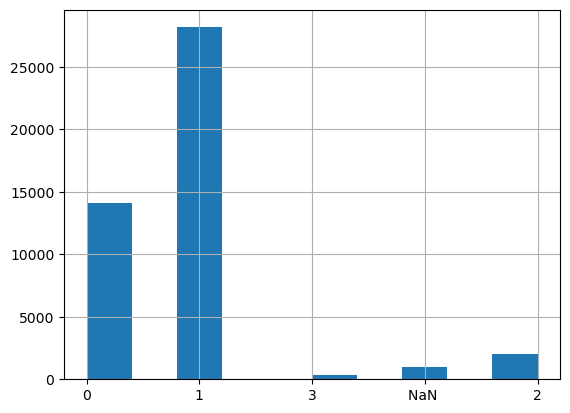

In [32]:
df['multiple_deliveries'].hist()

#### Treat 0 multiple deliveries as missing values. Fill theses and missing values with the mode, which is 1.

In [30]:
mode_value = X_train['multiple_deliveries'].mode()[0]

X_train['multiple_deliveries'] = X_train['multiple_deliveries'].fillna(mode_value).replace(0, mode_value)
X_test['multiple_deliveries'] = X_test['multiple_deliveries'].fillna(mode_value).replace(0, mode_value)

In [33]:
X_train.drop(['ID', 'Delivery_person_ID'], axis=1, inplace=True)
X_test.drop(['ID', 'Delivery_person_ID'], axis=1, inplace=True)


#### We want to perform scaling on features that are not one-hot encoded. The list of features are obtained from the function to one-hot encode categorical features earlier on.

In [34]:
one_hot_cols_list

Index(['Weatherconditions_conditions Fog', 'Weatherconditions_conditions NaN',
       'Weatherconditions_conditions Sandstorms',
       'Weatherconditions_conditions Stormy',
       'Weatherconditions_conditions Sunny',
       'Weatherconditions_conditions Windy', 'Road_traffic_density_Jam ',
       'Road_traffic_density_Low ', 'Road_traffic_density_Medium ',
       'Road_traffic_density_NaN ', 'Type_of_order_Drinks ',
       'Type_of_order_Meal ', 'Type_of_order_Snack ',
       'Type_of_vehicle_electric_scooter ', 'Type_of_vehicle_motorcycle ',
       'Type_of_vehicle_scooter ', 'Festival_No ', 'Festival_Yes ',
       'City_NaN ', 'City_Semi-Urban ', 'City_Urban '],
      dtype='object')

In [35]:
from sklearn.preprocessing import StandardScaler

def scale_continuous_features(df_train, df_test, continuous_cols):
    scaler = StandardScaler()
    df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train[continuous_cols]), columns=continuous_cols, index=df_train.index)
    df_test_scaled = pd.DataFrame(scaler.transform(df_test[continuous_cols]), columns=continuous_cols, index=df_test.index)
    return df_train_scaled, df_test_scaled, scaler

def preprocess_data(X_train, X_test, one_hot_cols_list):
    continuous_cols = [col for col in X_train.columns if col not in one_hot_cols_list]
    
    continuous_X_train, continuous_X_test, scaler = scale_continuous_features(X_train, X_test, continuous_cols)
    
    one_hot_encoded_X_train = X_train[one_hot_cols_list]
    one_hot_encoded_X_test = X_test[one_hot_cols_list]
    
    X_train = pd.concat([continuous_X_train, one_hot_encoded_X_train], axis=1)
    X_test = pd.concat([continuous_X_test, one_hot_encoded_X_test], axis=1)
    
    return X_train, X_test

X_train, X_test = preprocess_data(X_train, X_test, one_hot_cols_list)


### Model Building and Evaluation

In [80]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import KFold


class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=0.01)
        x = self.fc2(x)
        return x


class QuantileLoss(nn.Module):
    def __init__(self, quantile):
        super(QuantileLoss, self).__init__()
        self.quantile = quantile
        
    def forward(self, preds, targets):
        errors = targets - preds
        loss = torch.max((self.quantile - 1) * errors, self.quantile * errors)
        return torch.mean(loss)

random_seed = 42
np.random.seed(random_seed)
torch.manual_seed(random_seed)

num_epochs = 70
batch_size = 25
input_size = X_train.shape[1]  
hidden_size = 200
output_size = 1
quantiles = [0.1, 0.5, 0.9]  
k_folds = 5

kf = KFold(n_splits=k_folds, shuffle=True, random_state=random_seed)

def create_dataloader(X, y):
    X_tensor = torch.tensor(X.values.astype(np.float32))
    y_tensor = torch.tensor(y.values.astype(np.float32))
    dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    return dataloader

train_dataloader = create_dataloader(X_train, y_train)
test_dataloader = create_dataloader(X_test, y_test)

train_losses = {q: [] for q in quantiles}
test_losses = {q: [] for q in quantiles}


for fold, (train_indices, val_indices) in enumerate(kf.split(X_train)):
    print(f"Fold {fold + 1}")

    X_train_fold, X_val_fold = X_train.iloc[train_indices], X_train.iloc[val_indices]
    y_train_fold, y_val_fold = y_train.iloc[train_indices], y_train.iloc[val_indices]


    models = {}
    criterions = {}
    optimizers = {}

    for q in quantiles:
        model = SimpleNet(input_size, hidden_size, output_size)
        criterion = QuantileLoss(q)
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        models[q] = model  
        criterions[q] = criterion
        optimizers[q] = optimizer


    for q in quantiles:
        model = models[q]
        criterion = criterions[q]
        optimizer = optimizers[q]

        for epoch in range(num_epochs):
            epoch_train_loss = 0.0
            epoch_val_loss = 0.0

            model.train() 
            for inputs, targets in train_dataloader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets.unsqueeze(1))
                loss.backward()
                optimizer.step()
                epoch_train_loss += loss.item() * inputs.size(0)

            epoch_train_loss /= len(train_dataloader.dataset)
            train_losses[q].append(epoch_train_loss) 

            model.eval() 
            with torch.no_grad():
                for inputs, targets in test_dataloader:
                    outputs = model(inputs)
                    loss = criterion(outputs, targets.unsqueeze(1))
                    epoch_val_loss += loss.item() * inputs.size(0)

            epoch_val_loss /= len(test_dataloader.dataset)
            test_losses[q].append(epoch_val_loss)  

            if (epoch+1) % 10 == 0:
                print(f'Quantile: {q}, Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_val_loss:.4f}')

print('Training finished!')


Fold 1
Quantile: 0.1, Epoch [10/70], Train Loss: 0.8109, Test Loss: 0.8153
Quantile: 0.1, Epoch [20/70], Train Loss: 0.7671, Test Loss: 0.7920
Quantile: 0.1, Epoch [30/70], Train Loss: 0.7468, Test Loss: 0.7798
Quantile: 0.1, Epoch [40/70], Train Loss: 0.7319, Test Loss: 0.7881
Quantile: 0.1, Epoch [50/70], Train Loss: 0.7193, Test Loss: 0.7709
Quantile: 0.1, Epoch [60/70], Train Loss: 0.7098, Test Loss: 0.7753
Quantile: 0.1, Epoch [70/70], Train Loss: 0.7005, Test Loss: 0.7681
Quantile: 0.5, Epoch [10/70], Train Loss: 2.0735, Test Loss: 2.0917
Quantile: 0.5, Epoch [20/70], Train Loss: 2.0054, Test Loss: 2.0340
Quantile: 0.5, Epoch [30/70], Train Loss: 1.9630, Test Loss: 2.0222
Quantile: 0.5, Epoch [40/70], Train Loss: 1.9291, Test Loss: 2.0011
Quantile: 0.5, Epoch [50/70], Train Loss: 1.9006, Test Loss: 1.9936
Quantile: 0.5, Epoch [60/70], Train Loss: 1.8752, Test Loss: 1.9940
Quantile: 0.5, Epoch [70/70], Train Loss: 1.8499, Test Loss: 2.0106
Quantile: 0.9, Epoch [10/70], Train Loss:

In [81]:
def evalute_model(models, quantiles, dataloader):
    overestimation_ratios = []
    for quantile in quantiles:
        model = models[quantile]  
        model.eval()  
        overestimation_count = 0
        total_samples = 0

        with torch.no_grad():
            for inputs, targets in dataloader:
                outputs = model(inputs)

                quantile_prediction = outputs.squeeze()

                overestimation_count += torch.sum(quantile_prediction > targets).item()
                total_samples += len(targets)

        overestimation_ratio = overestimation_count / total_samples
        overestimation_ratios.append((quantile, overestimation_ratio))

    for quantile, ratio in overestimation_ratios:
        print(f"Quantile: {quantile}, Overestimation Ratio: {ratio:.2%}")
    

evalute_model(models, quantiles, train_dataloader)

Quantile: 0.1, Overestimation Ratio: 8.47%
Quantile: 0.5, Overestimation Ratio: 49.87%
Quantile: 0.9, Overestimation Ratio: 92.99%


In [82]:
evalute_model(models, quantiles, test_dataloader)

Quantile: 0.1, Overestimation Ratio: 11.47%
Quantile: 0.5, Overestimation Ratio: 49.99%
Quantile: 0.9, Overestimation Ratio: 90.01%
